Betreut durch Dipl.-Biol. Ralf Darius  
WS2023 / 2024  
26. Feb 2024  
Hochschule Rhein-Waal

# Projektarbeit Data Mining and Machine Learning

## Analyse von Immobilienbewertungen

<p style="font-size: 2rem">
Till Wegener <a href="#fn1"><sup id="fn1-back">1</sup></a> und 
Dennis Adamczyk <a href="#fn2"><sup id="fn2-back">2</sup></a>
</p>

[<sup id="fn1">1</sup>](#fn1-back): Matrikelnummer: 28891, E-Mail-Adresse: till.wegener@hsrw.org  
[<sup id="fn2">2</sup>](#fn2-back): Matrikelnummer: 30545, E-Mail-Adresse: dennis.adamczyk@hsrw.org  


## Abstract

Die Analyse und Bewertung von Immobilien ist ein wichtiger Bestandteil des Immobilienmarktes. In dieser Arbeit wird ein Datensatz von Immobilienbewertungen aus Taiwan auf verschiedene Eigenschaften hin untersucht. Hierzu verwenden wir diverse Methoden aus den Bereichen des Data Mining und Machine Learning. Ziel ist es, die Bewertung von Immobilien, mithilfe einer linearen Regression, anhand verschiedener Eigenschaften vorherzusagen und zu analysieren.

Keywords:

*Data Mining, lineare Regression, multiple Regression, Immobilienmarkt*
<p style="page-break-after:always;"></p>

<h1>Inhaltsverzeichnis</h1>

<ol ol style="list-style-type: decimal;">
  <li><a href="#eigenständig">Eigenständigkeitserklärung</a></li>
  <li>
    <a href="#einleitung">Einleitung</a>
    <ol ol style="list-style-type: decimal;">
      <li><a href="#data">Vorstellung des Projektes</a></li>    
      <li><a href="#code">Vorbereitung Code</a></li>    
    </ol>
  </li>
  <li><a href="#datensatz">Beschreibung des Datensatzes</a></li>
  <li><a href="#deskriptiv">Deskriptive betrachtung des Datensatzes</a>
    <ol ol style="list-style-type: decimal;">
        <li><a href="#hist">Histogramme des Datensatzes</a></li>
        <li><a href="#scatter">Scatter-Plots des Datensatzes</a></li>
    </ol>
  </li>

  <li>
    <a href="#reg">Regressionsmodelle</a>
    <ol ol style="list-style-type: decimal;">
        <li><a href="#1dlinreg">Eindimensionale lineare Regression</a></li>
        <li><a href="#ndlinreg">Multidimensionale lineare Regression</a></li>
        <li><a href="#curvereg">Nichtlineare Regression</a></li>
        <li><a href="forrestreg">Random Forrest Regression</a></li>
    </ol>
  </li>
  <li><a href="#cluster">Cluster-Analyse von Nachbarschaften</a></li>
  <li><a href="#interpret">Interpretation der Ergebnisse</a></li>
  <li><a href="#fazit">Fazit</a></li>
  <li><a href="#aufgaben">Aufgabenverteilung</a></li>
  
  <li><a href="#literaturverzeichnis">Literaturverzeichnis</a></li>
</ol>

<h1 id="eigenständig">1 Eigenständigkeitserklärung</h2>


Hiermit erklären wir, dass wir die vorliegende Arbeit eigenständig und ohne fremde Hilfe angefertigt haben. Textpassagen, die wörtlich oder dem Sinn nach auf Publikationen oder Vorträgen anderer Autoren beruhen, sind als solche kenntlich gemacht.

<h1 id="einleitung">2 Einleitung</h2>

<h2 id="data">2.1 Vorstellung des Projektes</h2>

In dieser Arbeit betrachten wir den Datensatz ``Real Estate Valuation``<a href="#refdata">[1]</a> aus dem UCI Machine Learning Repository. Dieser Datensatz enthält Informationen über Immobilienbewertungen in Taiwan. Ziel unseres Projektes ist es, mithilfe unterschiedlicher Regressions-Verfahren zu überprüfen, ob der Wert pro Fläche abhängig von den diversen angegebenen Variablen ist. Dies würde es ermöglichen, für weitere Immobilien vorhersagen treffen zu können, bevor diese verkauft werden. Diese Vorhersagen könnten auch genutzt werden, um zu entscheiden ob eine Immobilie über oder unter dem erwartbaren Wert verkauft wird.

<h2 id="code">2.2 Vorbereitung Code</h2>

Bevor wir damit beginnen können die Daten zu analysieren, müssen wir sicherstellen das wir alle nötigen Python-Pakete installiert haben. Hierzu liegt diesem Notebook eine ``requirements.txt`` Datei bei. Der Python Paket-Manager ``PiP``<a href="#refpip">[2]</a> kann anhand dieser Datei die Pakete installieren. Dafür muss in diesem Ordner der folgende Kommando-Zeilen Befehl ausgeführt werden:

```cmd
pip install -r requirements.txt
```


Der erste Schritt für die bearbeitung des Datensatzes ist das Importieren der benötigten Bibliotheken. In unserem Fall verwenden wir die folgenden Bibliotheken:
- `pandas`<a href="#refpandas">[3]</a>  zur allgemeinen Datenverarbeitung
- `numpy`<a href="#refnumpy">[4]</a> zur numerischen Berechnung
- `matplotlib`<a href="#refmpl">[5]</a> zur Visualisierung der Daten
- `scikit-learn`<a href="#refsklearn">[7]</a> zur Implementierung der Regressionsmodelle

Hierzu genügt es, die Biliotheken zu importieren. Des Weiteren können wir hier festlegen, dass die Plots direkt im Notebook angezeigt werden sollen.

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Der nächste Schritt ist das Einlesen des Datensatzes. Hierzu können wir die Funktion ``ExcelFile`` von Pandas verwende. Diese Funktion ermöglicht es uns, die Daten aus einer Excel-Datei in ein ``DataFrame`` zu laden. Ein ``DataFrame`` ist eine zweidimensionale Datenstruktur, die von Pandas bereitgestellt wird. Ein ``DataFrame`` ist vergleichbar mit einer Tabelle in Excel oder einer multivariaten Datenmatrix in R. 

In [30]:
data = pd.read_excel("./data.xlsx")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


Als nächstes teilen wir den Datensatz in zwei Teile auf. Den großen Teil des Datensatzes (90%) verwenden wir für die weitere Arbeit in diesem Projekt. Die restlichen 10% des Datensatzes verwenden wir, um am Ende des Projektes die Genauigkeit des Modells zu überprüfen. Um sicherzustellen, dass die Aufteilung reproduzierbar ist, verwerden wir einen vordefinierten Seed. Für diese Aufgabe bietet und das `DataFrame` die Methode `sample`. Diese Methode gibt einen übergebenen Anteil des DataFrames zurück. Des Weiteren nimmt diese Methode einen Parameter ``random_state`` an, mit welchen wir die Pseudo-Zufällige Aufteilung reproduzierbar gestalten können.

In [3]:
seed = 1354
data_work = data.sample(frac=0.9, random_state=seed)
len(data_work)

373

Die Variable ``data_work`` beinhaltet nun die 90% der Daten welche wir für die weitere Arbeit verweden. Um nun den Test-Datensatz zu bestimmen können wir nun die Differenz aus ``data_work`` und ``data`` bilden.

In [4]:
data_test = data.drop(data_work.index)
len(data_test)

41

Wir können nun sicherstellen, dass wir keine Daten "veloren" haben, indem wir die Länge des ursprünglichen Datensatzes mit den beiden erstellen Datensätzen vergleichen.

In [5]:
assert(len(data_work) + len(data_test) == len(data))

Die beiden Teil-Datensätze können nun als `csv`-Dateien gespeichert. Hierzu können wir die Pandas-Funktion `to_csv` der `Dataframes` verwenden.

In [6]:
data_work.to_csv("data_work.csv", index=False)
data_test.to_csv("data_test.csv", index=False)

Nun sind wir bereit für die weitere Analyse der Daten.

<h1 id="datensatz">3 Beschreibung des Datensatzes</h2>

Der Datensatz ``Real Estate Valuation``<a href="#refdata">[1]</a> welchen wir betrachten besteht aus 414 Objekten. Jedes der Objekte bildet eine Bewertung einer Immobilie im Sindian Distrikt aus Taiwan ab. Für jedes Objekt ist der Preis pro normierte Fläche als Wert ``Y`` angegeben. Dieser Wert wird in der Einheit ``10000 New Taiwan Dollar/Ping`` angegeben. Hier hat ``1Ping`` eine Größe von ``3.3 Quadratmeter``. Zur Zeit der Verfassung dieses Projektberichtes (26. Feb 2024, 16:00 UTC) haben ``10000 New Taiwan Dollar`` einen Euro-Wert von ``291,97€``.

Umgeformt ist die Einheit dieser Variable also

$$ \frac{291.97€}{3.3m^2} \thickapprox {88.48€}/{m^2} $$

Diesen Faktor speichern wir uns für die spätere Verwendung.

In [7]:
# Umrechnungsfaktor von 10000 NT$/ping in Euro/m²
price_factor = 88.48

Die weiteren Variablen des Datensatzes sind:

- `X1` *Transaction date* - Datum 
- `X2` *House Age* - Alter der Immobilie in Jahren
- `X3` *Distance to nearest MRT Station* - Distanz zu der nächsten ``Mass Rapid Transit``-Station in Metern. In diesem Fall die ``Metro Taipei`` <a href="#refmrt">[6]</a>.
- `X4` *Number of convenience stores* - Nummer der Convenice-Stores (vgl. Mini-Markt) in Fußnähe
- `X5` *Latitude* - geografisches Breitengrad der Immobilie 
- `X6` *Longitude* - geografisches Längengrad der Immobilie 

Bei den Variablen `X2`, `X3`, `X5` und `X6` handelt es sich um kontinuierliche Variablen. Die Variablen `X1` und `X4` hingegen sind diskrete Variablen.

Bei der Variable `X1` ist zu beachten, dass das Datum nicht in einem normalen Datumsformat vorliegt. Das Datum wird hier als Zahl angegeben, wobei der Integer-Teil die Jahreszahl und der Dezimal-Teil den Prozentsatz des Jahres darstellt. Hierbei wird allerdings nur der Monat berücksichtigt. Dementsprechend ist der Wert ``2013.25`` als ``März 2013`` zu interpretieren. Da in diesem Datensatz nicht das genaue Datum von Bedeutung ist, sondern nur der Monat, werden wir die Variable `X1` als diskrete Variable behandeln, und nicht wie für ein Datum üblich, als kontinuierliche Variable.

Der Datensatz weißt auch eine Variable `No` auf, dies ist allerdings nur ein Index welcher keine statische Bedeutung ist. Dementsprechend werden wir diese in unseren Analysen nicht beachten.

Keine der Variablen weißt fehlende Werte auf. 

<h1 id="deskriptiv">4 Deskriptive Betrachtung des Datensatzes</h2>

Werte für die deskriptive Beschreibung des Datensatzes können wir uns mithilfe der Funktion `describe` des ``DataFrames`` ausgeben lassen.

In [8]:
# deskriptive Statistik explizit nicht für 'ID'-Spalte
data_no_id = data.drop("No", axis=1)

data_no_id.describe(percentiles=[])

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.00000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.96903,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.01241,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.93207,121.473530,7.600000
50%,2013.166667,16.100000,492.231300,4.000000,24.97110,121.538630,38.450000
max,2013.583333,43.800000,6488.021000,10.000000,25.01459,121.566270,117.500000


Anhand dieser Tabelle können die Werte `Anzahl`, `Mittelwert`, `Standardabweichung`, `Minimum`, `Median` (Äquivalent mit dem 50ten Perzentil) und `Maximum` der Variablen abgelesen werden.

Explizit können wir folgende Werte ablesen:

- Das durchschnittliche Alter der Immobilien beträgt 17.712 Jahre
- Die durchschnittliche Distanz zu der nächsten MRT-Station beträgt 1083.885 Meter
- Die durchschnittliche Anzahl der Convenience-Stores in Fußnähe beträgt 4.094
- Der durchschnittliche Preis pro Fläche beträgt $ 37.98 \frac{10000 NTD}{ping} $ oder  $ 3306.487€/m^2 $
- Der Datensatz beinhält Transaktionen aus dem Zeitraum August 2012 bis Juli 2013
- Der Mittelwert und der Median der geografischen Koordinaten sind nahezu identisch. 

<h2 id="hist">4.1 Histogramme des Datensatzes</h2>

Die deskriptive Beschreibung des Datensatzes gibt uns einen ersten Eindruck über die Verteilung der Daten. Diese Daten können wir auch visuell darstellen. Hierzu können wir die Funktion `hist` des ``DataFrames`` verwenden. Diese Funktion erstellt für jede Variable ein Histogramm.

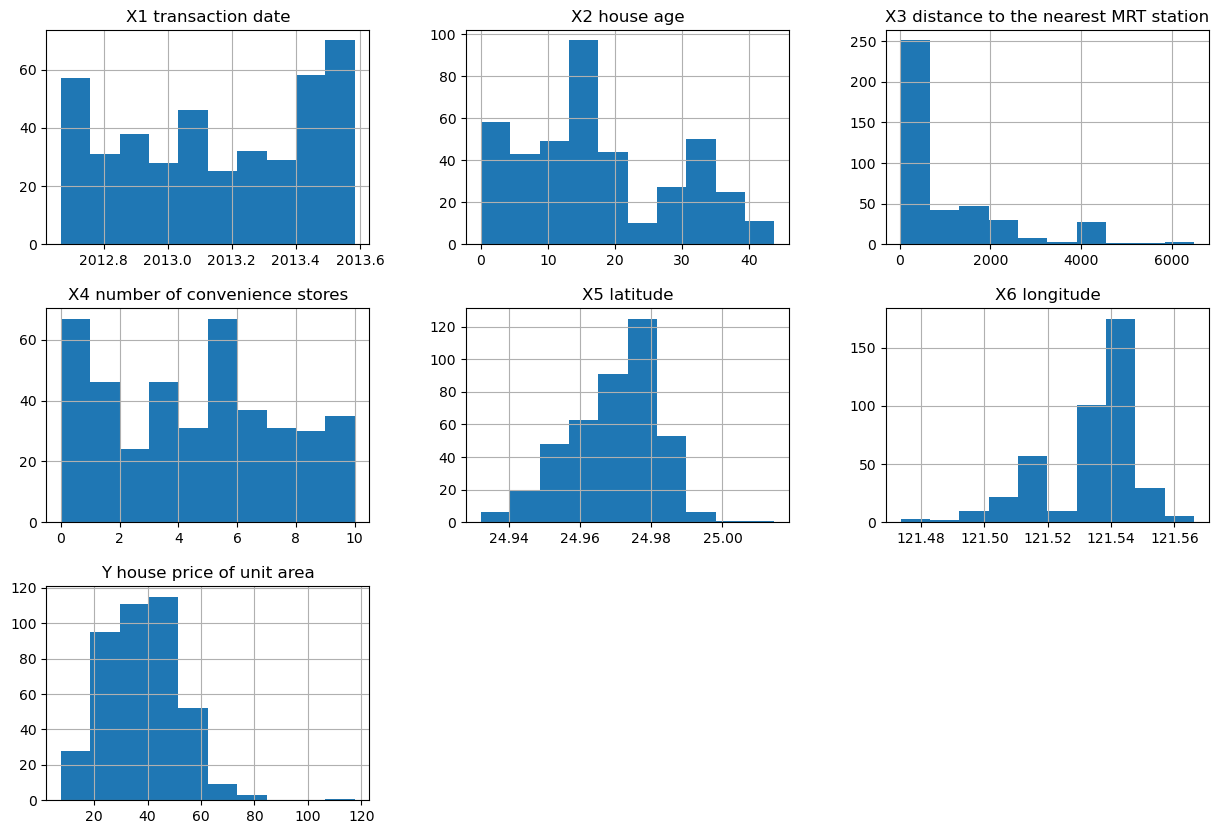

In [9]:
hist = data_no_id.hist(figsize=(15, 10))

Anhand der Histrogramme können wir weitere Informationen über die Verteilung der Daten ablesen. Die Variable `X3` weist eine linkssteile Verteilung auf. Die Variablen `X5` und `X6` weisen eine spitze Verteilung auf. Des Weiteren ist die Varianz der Werte sehr gering.

<h2 id="scatter">4.2 Scatter-Plots des Datensatzes</h2>

Alternativ hierzu können wir die verschiedene Variablen auch in einem Scatter-Plot darstellen. Hierzu können wir eine Funktion definieren, welche eine der Variablen gegen unsere Zielvariable `Y` aufträgt. Hierbei können wir die Funktion `scatter` des ``DataFrames`` verwenden.

In [10]:
def plot_scatter(axis):
    data_no_id.plot.scatter(x=axis, y="Y house price of unit area", figsize=(6, 4))    

Die Funktion ``plot_scatter`` können wir nun nutzen um uns die individuellen Scatter-Plots der Variablen gegen die Zielvariable `Y` anzeigen zu lassen.

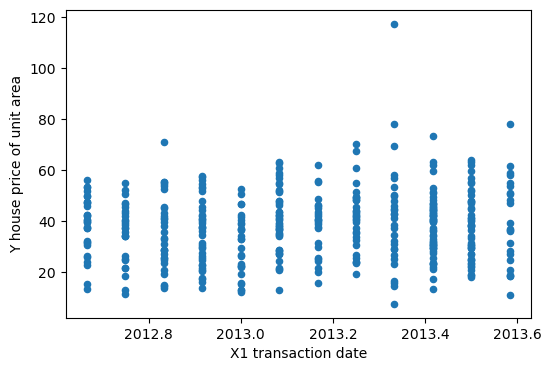

In [11]:
plot_scatter("X1 transaction date")

Bei der Betrachtung des Scatter-Plots von `X1` gegen `Y` lässt sich beobachten, dass die Werte von `Y` über die Zeit hinweg leicht ansteigen. Dies könnte darauf hindeuten, dass die Immobilienpreise in dem vom Datensatz abgebildeten Zeitraum gestiegen sind.

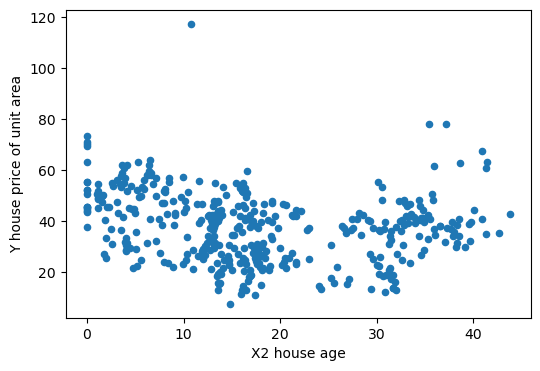

In [12]:
plot_scatter("X2 house age")

Der Scatter-Plot von `X2` gegen `Y` zeigt, dass die Immobilienpreise mit steigendem Alter der Immobilie sinken. Es lässt sich allerdings auch erkennen, dass die Streuung der Werte bei jüngeren Immobilien, aber auch bei vergleichsweise alten Immobilien (beginnend ab ~30 Jahre), sehr hoch ist.

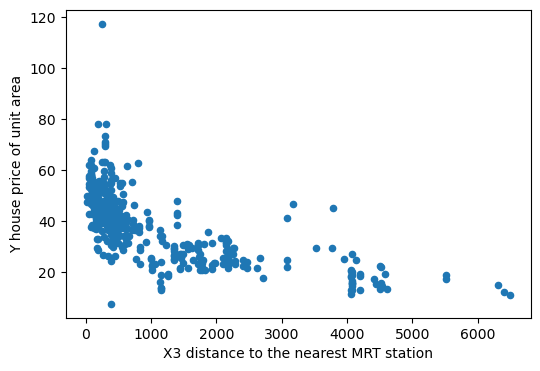

In [13]:
plot_scatter("X3 distance to the nearest MRT station")

Das auftragen von `X3` gegen `Y` zeigt, dass die Immobilienpreise mit steigender Distanz zur nächsten MRT-Station sinken. Hierbei ist zu beachten, dass die Streuung der Werte bei geringen Distanzen zur MRT-Station sehr hoch ist. Es lässt sich auch erkennen, dass ein großteil der Immobilien in einem Radius von 1000 Metern um eine MRT-Station liegen.

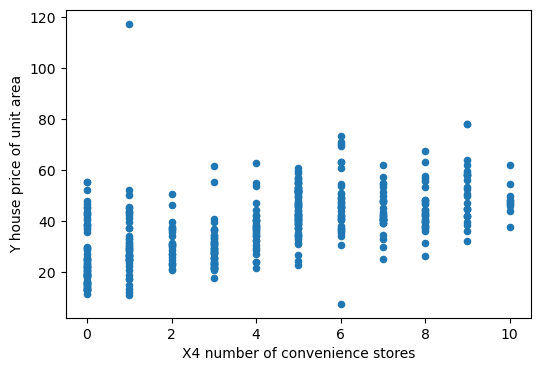

In [14]:
plot_scatter("X4 number of convenience stores")

Bei dem Plotten der Zahl der Convenience-Stores in Fußnähe (`X4`) gegen den Zielwert (`Y`) lässt sich erkennen, dass die Immobilienpreise mit steigender Anzahl der Convenience-Stores in Fußnähe steigen. Es ist allerdings auch zu erkennen, dass die Streuung der Werte vergleichsweise hoch ist.

Für die Betrachtung der geografischen Koordinaten `X5` und `X6` gegen `Y` verwenden wir einen gemeinsamen Scatter-Plot. Hier sind die Koordinaten auf den jeweiligen Achsen aufgetragen, und der Preis pro Fläche wird durch die Farbe der Punkte dargestellt.

Hierzu können wir erneut die Funktion `scatter` verwenden, allerdings können wir hier die Farbe der Punkte durch den Parameter `c` bestimmen. Hierbei können wir die Variable `Y` übergeben, um die Punkte nach dem Preis pro Fläche zu färben.

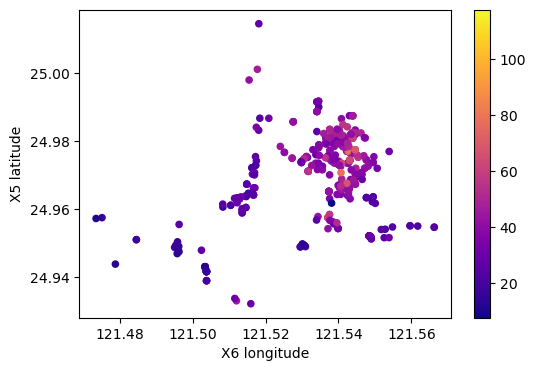

In [15]:
ax = data_no_id.plot.scatter(y="X5 latitude", x="X6 longitude", c=(data_no_id["Y house price of unit area"]), cmap="plasma", figsize=(6, 4))

Wenn wir die geografischen Koordinaten `X5` und `X6` gegen den Zielwert `Y` auftragen, lässt sich erkennen, dass die Immobilienpreise in der Nähe des Breitengrades 24.97 und des Längengrades 121.54 erkennbar höher sind als in anderen Regionen. Des Weiteren lässt sich eine Ballung von Datenpunkten in diesem Bereich erkennen.

<h1 id="reg">5 Regressionsmodelle</h2>

Im folgenden schauen wir uns an, in wie weit es möglich ist, mithilfe verschiedener Regressions-Modelle den Preis pro Fläche vorherzusagen. Hierzu verwenden wir die Bibliothek `scikit-learn`<a href="#refsklearn">[7]</a>. Diese Bibliothek bietet uns diverse Funktionen zur Erstellung von Regressions-Modellen. Von nun an verwenden wir den Datensatz `data_work` für die Erstellung der Modelle. Den Datensatz `data_test` verwenden wir am Ende des Projektes, um die Genauigkeit der verschiedenen Modelle zu überprüfen.

Für die Weitere Betrachtung der Datensatzes mithilfe der verschiedenen Regressions-Modelle schauen wir uns alle Objekte des Trainings-Datensatzes an. Die verschiedenen Modelle können wir dann mithilfe des Test-Datensatzes überprüfen.

Die Regressions-Modelle werden sich mit den Variablen `X1`, `X2`, `X3` und `X4` beschäftigen. Die Variablen `X5` und `X6` werden wir gesondert im Anschluss an die Regressions-Modelle betrachten.

In [16]:
reg_data = data_work.drop("No", axis=1)
reg_data.drop("X5 latitude", axis=1, inplace=True)
reg_data.drop("X6 longitude", axis=1, inplace=True)

reg_val = reg_data["Y house price of unit area"]
reg_vars = reg_data.drop("Y house price of unit area", axis=1)

test_data = data_test.drop("No", axis=1)
test_val = test_data["Y house price of unit area"]
test_vars = test_data.drop("Y house price of unit area", axis=1)
test_vars.drop("X5 latitude", axis=1, inplace=True)
test_vars.drop("X6 longitude", axis=1, inplace=True)

<h2 id="1dlinreg">5.1 Eindimensionale lineare Regression</h2>

Als erstes betrachten wir eindimensionale lineare Regression. 

Die eindiemensionale lineare Regression ist ein einfaches Regressions-Modell, welches die Beziehung zwischen einer unabhängigen Variable und einer abhängigen Variable beschreibt. Hierbei wird angenommen, dass die abhängige Variable linear von der unabhängigen Variable abhängt. Das Modell kann durch die Gleichung

$$ Y = b + m * X + f $$

beschrieben werden. Hierbei ist $Y$ die abhängige Variable, $X$ die unabhängige Variable, $b$ der y-Achsenabschnitt, $m$ die Steigung der Linie und $f$ der Fehler.

Hierbei überprüfen wir, in wie weit der Preis pro Fläche von den unterschiedlichen Variablen abhängig ist. Als ersten Schritt dazu können wir die Korrelation der Variablen untereinander betrachten. Hierzu können wir die Funktion `corr` des ``DataFrames`` verwenden. Pandas verwendet hierbei die Pearson-Korrelation. Diese Funktion gibt uns die Korrelation der Variablen untereinander zurück.

In [17]:
reg_data.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.011924,0.079257,-0.014421,0.071762
X2 house age,0.011924,1.000000,0.025062,0.051772,-0.193963
X3 distance to the nearest MRT station,0.079257,0.025062,1.000000,-0.596669,-0.668799
X4 number of convenience stores,-0.014421,0.051772,-0.596669,1.000000,0.561066
Y house price of unit area,0.071762,-0.193963,-0.668799,0.561066,1.000000


Anhand dieser Tabelle können wir die Korrelation der Variablen untereinander ablesen. In unserem Fall interessiert uns die Korrelation der Variablen mit der Variable `Y`. Hierbei können wir ablesen, dass die Variable `X3` mit *0.669* die größte absolute Korrelation  mit der Variable `Y` aufweist. Die Variablen `X4` weißt mit einem Korrelationskoeffizienten von `0.56` auf eine mittel-starke Korrelation hin. Die Variablen `X1` und `X2` weisen hingegen nur marginale Korrelations-Koeffizienten von *0.07* und *0.19* auf.

Insgesamt lassen sich anhand der Korrelationen der Variablen bereits einige Aussagen treffen:

- Das Alter der Immobilie scheint negativ mit dem Preis pro Fläche korreliert zu sein. Die Korrelation ist allerdings vergleichsweise gering.
- Die Nummer der Convenience-Stores in Fußnähe scheint positiv mit dem Preis pro Fläche korreliert zu sein. Die Korrelation ist hierbei weder besonders stark noch besonders schwach.
- Die Distanz zu der nächsten MRT-Station scheint negativ mit dem Preis pro Fläche korreliert zu sein. Diese Korrelation weißt den stärksten Wert auf.
- Das Transaktionsdatum weißt beinah keine Korrelation mit dem Preis pro Fläche auf.

Nach der Betrachtung der Korrelation lässt sich vermuten, dass ein simples eindimensionales lineares Regressions-Modell mit den Variablen `X3` und `X4` die besten Ergebnisse liefern wird. Diese Modelle können wir nun mithilfe der Funktion `LinearRegression` aus der Bibliothek `scikit-learn` erstellen.

Als erstes importieren wir dafür die nötigen Funktionen der Bibliothek `scikit-learn`. Dannach können wir die Funktion `LinearRegression` verwenden, um die Modelle zu erstellen. Wir erstellen jeweils ein Modell pro Variable die wir betrachten wollen.

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regrX3 = linear_model.LinearRegression()
regrX4 = linear_model.LinearRegression()

Als nächstes können wir die beiden Modelle anhand des Trainings-Datensatzes trainieren. Hierzu können wir die Funktion `fit` der Modelle verwenden. Diese Funktion nimmt die unabhängigen Variable und die abhängige Variable als Parameter an. Hierbei ist zu beachten, dass die unabhängige Variable als zweidimensionales Array übergeben werden muss. Hierzu können wir die Funktion `reshape` verwenden um die richtige Form zu erhalten.

In [37]:
regrX3.fit(reg_vars["X3 distance to the nearest MRT station"].values.reshape(-1, 1)  , reg_val)
regrX4.fit(reg_vars["X4 number of convenience stores"].values.reshape(-1, 1), reg_val)

LinearRegression()

Nachdem wir die Modelle nun trainiert haben, können wir die Modelle anhand des Test-Datensatzes überprüfen. Hierzu können wir die Funktion `predict` der Modelle verwenden. Das Ergebnis dieser Funktion können wir dann mit den tatsächlichen Werten vergleichen. Um diesen Vergleich zu vereinfachen, können wir die Funktion `mean_squared_error` der Bibliothek `scikit-learn` verwenden. Diese Funktion implementiert den mittleren quadratischen Fehler. Dieser Wert gibt uns an, wie weit die vorhergesagten Werte von den tatsächlichen Werten entfernt sind.

In [38]:
y_predX3 = regrX3.predict(test_vars["X3 distance to the nearest MRT station"].values.reshape(-1, 1))
y_predX4 = regrX4.predict(test_vars["X4 number of convenience stores"].values.reshape(-1, 1))

print("Mean squared error X3: %.2f"
        % mean_squared_error(test_val, y_predX3))

print("Mean squared error X4: %.2f"
        % mean_squared_error(test_val, y_predX4))

Mean squared error X3: 76.45
Mean squared error X4: 88.77


Anhand dieser Resultate können wir ablesen, dass das Modell der Variable `X3` einen gerineren mittleren quadratischen Fehler aufweist als das Modell der Variable `X4`. Dies bedeutet, dass das Modell der Variable `X3` die tatsächlichen Werte besser vorhersagen kann als das Modell der Variable `X4`.

Der Vorteil einer eindimensionalen linearen Regression ist, dass wir sie in einem Scatter-Plot darstellen können. Im folgenden Stellen wir die Test-Daten und die Vorhersagen der Modelle in einem Scatter-Plot dar.

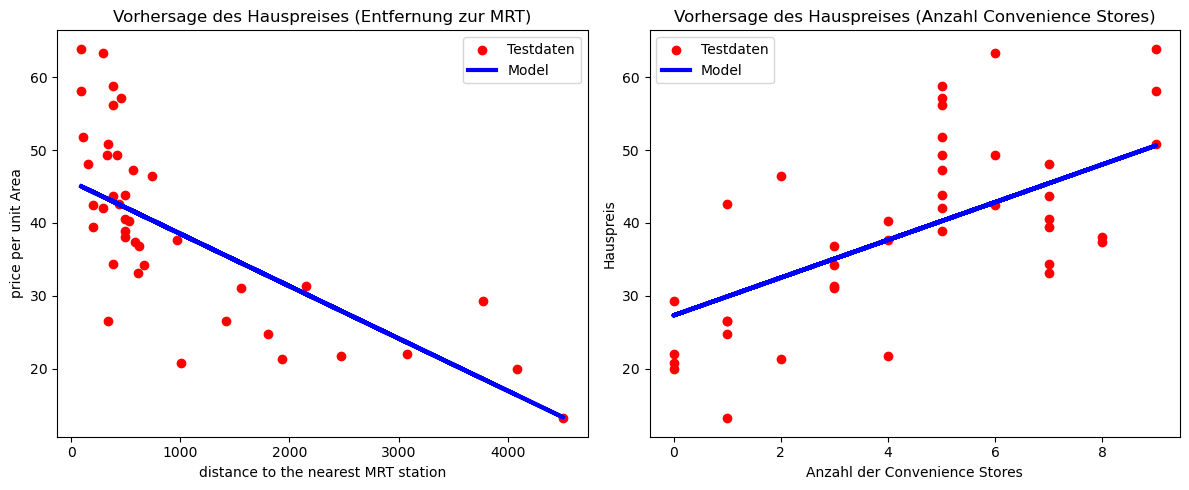

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot 1: Variable X3
ax1.scatter(test_vars["X3 distance to the nearest MRT station"], test_val, color='red')
ax1.plot(test_vars["X3 distance to the nearest MRT station"], y_predX3, color='blue', linewidth=3)
ax1.legend(["Testdaten", "Model"])
ax1.set_title("Vorhersage des Hauspreises (Entfernung zur MRT)")  # More specific title
ax1.set_xlabel("distance to the nearest MRT station")
ax1.set_ylabel("price per unit Area")

# Plot 2: Variable X4
ax2.scatter(test_vars["X4 number of convenience stores"], test_val, color='red')
ax2.plot(test_vars["X4 number of convenience stores"], y_predX4, color='blue', linewidth=3)
ax2.legend(["Testdaten", "Model"])
ax2.set_title("Vorhersage des Hauspreises (Anzahl Convenience Stores)")  # Specific title
ax2.set_xlabel("Anzahl der Convenience Stores")
ax2.set_ylabel("Hauspreis")

fig.tight_layout()
plt.show()

Die Diagramme zeigen, den Verlauf der linearen Modelle im und die Verteilung der Testdaten. Anhand dieser Diagramme lässt sich bereits erkennen, dass eine eindimensionale lineare Regression nicht ausreicht, um den Preis pro Fläche akkurat vorherzusagen.

<h2 id="ndlinreg">5.2 Multidimensionale lineare Regression</h2>

Der nächste Schritt ist die Betrachtung einer multidimensionalen linearen Regression. Hierbei handelt es sich um ein Regressions-Modell, welches die Beziehung zwischen mehreren unabhängigen Variablen und einer abhängigen Variable beschreibt. Die Multidimensionale lineare Regression kann durch die Gleichung

$$ Y = b + m_1 * X_1 + m_2 * X_2 +  m_\dots * X_\dots + m_n * X_n + f $$

beschrieben werden.

In diesem Fall verwenden wir unsere 4 Variablen `X1`, `X2`, `X3` und `X4` als unabhängige Variablen. Der Code für die Erstellung und das Trainieren der Modelle ist hierbei beinah identisch mit dem Code für die eindimensionale lineare Regression. Der einzige Unterschied 
ist, dass wir alle 4 Variablen für das trainieren des Models verwenden.

In [22]:
multiReg = linear_model.LinearRegression()

multiReg.fit(reg_vars, reg_val)

multiPred = multiReg.predict(test_vars)

print("Mean squared error Multi: %.2f"
        % mean_squared_error(test_val, multiPred))

Mean squared error Multi: 45.43


Mit einem mittleren quadratischen Fehler von `45.43` ist das Modell der multidimensionalen linearen Regression besser als beide Modelle der eindimensionalen linearen Regression. Aufgrund der höheren Dimensionalität des Modells ist es allerdings nicht mehr möglich, das Modell in einem Scatter-Plot darzustellen.

<h2 id="curvereg">5.3 Eindimensionale nichtlineare Regression</h2>

Nachdem wir u. a. die eindimensionale lineare Regression betrachtet haben, wenden wir uns nun der eindimensionalen nichtlinearen Regression zu. Diese Art der Regression wird verwendet, wenn die Beziehung zwischen der unabhängigen Variable und der abhängigen Variable nicht linear ist. In solchen Fällen kann ein nichtlineares Modell eine bessere Anpassung und Vorhersagegenauigkeit bieten.

Die eindimensionale nichtlineare Regression kann durch eine Vielzahl von Modellen repräsentiert werden, beispielsweise durch Polynomfunktionen höherer Ordnung oder durch exponentielle und logarithmische Funktionen. Die Auswahl des spezifischen Modells hängt von der Art der Daten und der zugrundeliegenden Beziehung ab. Ein einfaches Beispiel für ein nichtlineares Modell ist eine quadratische Funktion, die wie folgt ausgedrückt werden kann:

$$ Y = a + bX + cX^2 + f $$

Hierbei ist $Y$ die abhängige Variable, $X$ die unabhängige Variable, $a$ der y-Achsenabschnitt, $b$ und $c$ sind Koeffizienten, die die Form der Parabel bestimmen, und $f$ ist der Fehler.

Um die nichtlineare Regression auf unsere Daten anzuwenden, wählen wir eine Variable, von der wir vermuten, dass sie in einer nichtlinearen Beziehung zum Hauspreis pro Flächeneinheit steht. Basierend auf der vorherigen Analyse und der Betrachtung der Daten könnten wir beispielsweise untersuchen, ob die Beziehung zwischen der Distanz zur nächsten MRT-Station (X3) und dem Hauspreis pro Flächeneinheit nichtlinear ist.

Zur Implementierung der nichtlinearen Regression nutzen wir die `PolynomialFeatures`-Funktion aus der `scikit-learn`-Bibliothek, um unsere unabhängige Variable in ein Polynom höherer Ordnung umzuwandeln, gefolgt von einem linearen Modell, das auf die transformierten Daten passt.

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Erstellen eines Polynom-Modells 2. Grades für X3
poly_model = make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression())

# Anpassen des Modells an die Daten
poly_model.fit(reg_vars["X3 distance to the nearest MRT station"].values.reshape(-1, 1), reg_val)

# Vorhersagen mit dem Test-Datensatz
y_pred_poly = poly_model.predict(test_vars["X3 distance to the nearest MRT station"].values.reshape(-1, 1))

# Berechnung des mittleren quadratischen Fehlers
print("Mean squared error for Polynomial Model: %.2f"
      % mean_squared_error(test_val, y_pred_poly))

Mean squared error for Polynomial Model: 63.65


Dieser Ansatz ermöglicht es uns, nichtlineare Muster in den Daten zu erfassen und eine präzisere Vorhersage des Hauspreises zu machen, basierend auf der Distanz zur nächsten MRT-Station. Durch die Anpassung des Grades des Polynoms können wir die Komplexität des Modells erhöhen und so eine bessere Anpassung an die Daten erzielen.

Um die Ergebnisse zu visualisieren, können wir die Testdaten und die Vorhersagen des nichtlinearen Modells in einem Scatter-Plot darstellen. Dies ermöglicht uns, die Anpassung des Modells an die Daten zu beurteilen und zu vergleichen, wie gut es im Vergleich zu den linearen Modellen abschneidet.

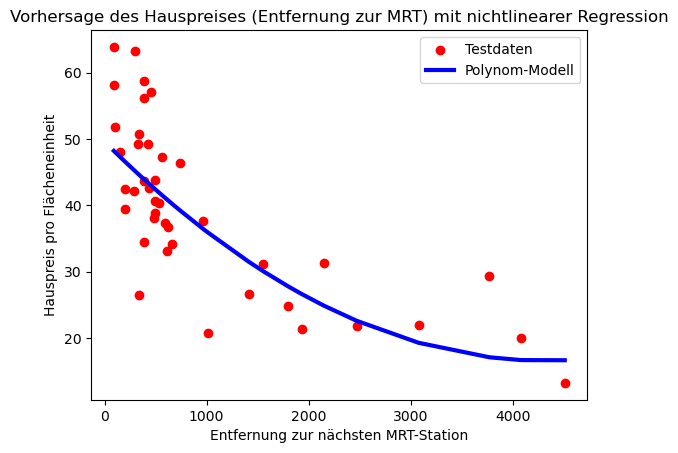

In [36]:
plt.scatter(test_vars["X3 distance to the nearest MRT station"], test_val, color='red')
plt.plot(sorted(test_vars["X3 distance to the nearest MRT station"]), poly_model.predict(sorted(test_vars["X3 distance to the nearest MRT station"].values.reshape(-1, 1))), color='blue', linewidth=3)
plt.legend(["Testdaten", "Polynom-Modell"])
plt.title("Vorhersage des Hauspreises (Entfernung zur MRT) mit nichtlinearer Regression")
plt.xlabel("Entfernung zur nächsten MRT-Station")
plt.ylabel("Hauspreis pro Flächeneinheit")

plt.show()

Dieses Beispiel zeigt, dass die eindimensionale nichtlineare Regression eine leistungsfähige Methode ist, um komplexe Beziehungen zwischen Variablen zu modellieren und kann insbesondere dann von Vorteil sein, wenn die Annahme der Linearität nicht zutrifft.

<h2 id="curvereg">5.4 Mehrdimensionale nichtlineare Regression</h2>

Nachdem wir die Anwendung der eindimensionalen nichtlinearen Regression betrachtet haben, erweitern wir unseren Ansatz nun auf die mehrdimensionale nichtlineare Regression. Dieser Ansatz ist besonders nützlich, wenn die Beziehung zwischen mehreren unabhängigen Variablen und der abhängigen Variable komplex und möglicherweise nichtlinear ist. Durch die Einbeziehung mehrerer Variablen können wir ein genaueres und umfassenderes Modell der zugrundeliegenden Beziehungen erstellen.

Die mehrdimensionale nichtlineare Regression erweitert das Konzept der nichtlinearen Regression, indem sie Polynomfunktionen auf ein multivariates Setting anwendet. Hierbei werden polynomische Merkmale nicht nur für eine einzelne Variable, sondern für alle unabhängigen Variablen im Datensatz erstellt. Dies ermöglicht die Modellierung von Interaktionen zwischen den Variablen sowie nichtlinearen Effekten.

Um ein mehrdimensionales nichtlineares Regressionsmodell zu implementieren, verwenden wir erneut die `PolynomialFeatures`-Funktion aus der `scikit-learn`-Bibliothek. Diesmal wenden wir sie jedoch auf den gesamten Satz unabhängiger Variablen an, um ein umfassendes Set polynomischer Merkmale zu erzeugen:

In [44]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomische Merkmale erstellen
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(reg_vars)

Durch die Anwendung der `PolynomialFeatures`-Funktion mit `degree=2` transformieren wir unsere unabhängigen Variablen in ein Format, das nicht nur die ursprünglichen Variablen, sondern auch ihre quadrierten Werte und die Interaktionsterme zwischen ihnen umfasst. Diese Transformation erhöht die Dimensionalität des Feature-Raums, ermöglicht es aber dem linearen Modell, nichtlineare Beziehungen zu erfassen.

Nachdem wir die polynomischen Merkmale erstellt haben, folgt der nächste Schritt, ein lineares Regressionsmodell auf diesen erweiterten Feature-Satz anzuwenden:

In [45]:
# Lineares Regressions-Modell erstellen
model = linear_model.LinearRegression()

# Modell trainieren
model.fit(X_train_poly, reg_val)

LinearRegression()

Durch das Training des linearen Regressionsmodells auf dem polynomisch erweiterten Datensatz sind wir in der Lage, ein komplexeres Modell zu erstellen, das die nichtlinearen Beziehungen zwischen den Variablen und der Zielvariable berücksichtigt.

Um die Leistung des Modells zu bewerten, verwenden wir den mittleren quadratischen Fehler (Mean Squared Error, MSE) auf einem Testdatensatz:

In [46]:
print("Mean squared error MultiPoly: %.2f"
        % mean_squared_error(test_val, model.predict(poly.fit_transform(test_vars))))

Mean squared error MultiPoly: 34.91


Der resultierende mittlere quadratische Fehler von 34.91 zeigt die Genauigkeit des Modells bei der Vorhersage der Zielvariable auf Basis der Testdaten. Ein niedrigerer MSE-Wert deutet auf eine höhere Vorhersagegenauigkeit des Modells hin.

Die Anwendung der mehrdimensionalen nichtlinearen Regression ermöglicht eine tiefere und genauere Analyse der Beziehungen zwischen mehreren Variablen und der Zielgröße. Durch die Berücksichtigung von Interaktionen und nichtlinearen Effekten können wir ein realistischeres Modell der Realität erstellen, was besonders in komplexen Anwendungsfällen wie der Vorhersage von Immobilienpreisen von großem Wert ist.

<h2 id="forrestreg">5.5 Random Forrest Regression</h2>

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

y_train = np.ravel(reg_val)
y_test = np.ravel(test_val)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}

reg =RandomForestRegressor(**params)

reg.fit(reg_vars, y_train)

y_pred = reg.predict(test_vars)
mean_squared_error(y_test, y_pred, squared=False)

5.756343922301324

Feature importance

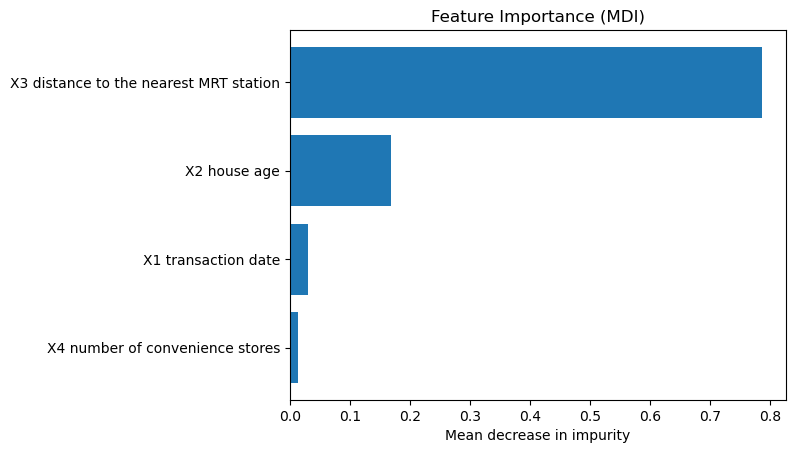

In [25]:
feature_importance = reg.feature_importances_
feature_names = reg_vars.columns

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

Permutation feature importance


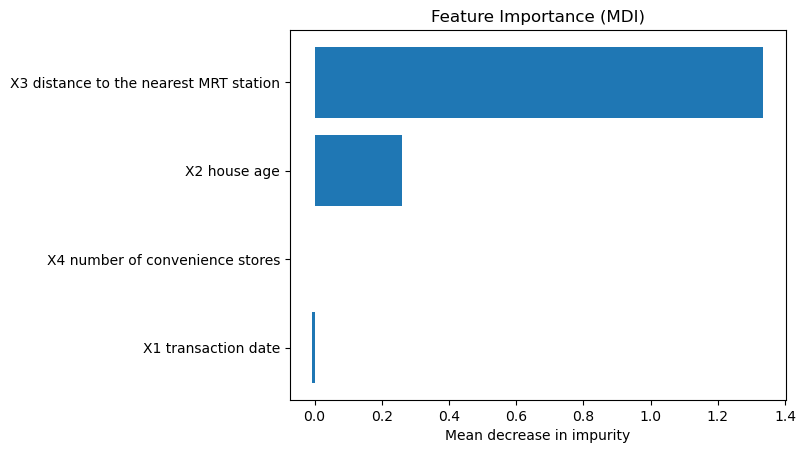

In [26]:
result = permutation_importance(
    reg, test_vars, y_test, n_repeats=10, random_state=42, n_jobs=2
)

tree_importances = pd.Series(result.importances_mean, index=feature_names)
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity")
plt.show()

<h1 id="cluster">6. Cluster-Analyse von Nachbarschaften</h2>

Da der Datensatz auch geografische Koordinaten beinhaltet, können wir auch eine Cluster-Analyse durchführen. Hierbei können wir die geografischen Koordinaten der Immobilien in Cluster einteilen. Dies kann uns Einblicke dazu geben, ob es spezifische Regionen gibt, in denen die Immobilienpreise besonders hoch oder besonders niedrig sind. Hierzu können wir erneut die Bibliothek `scikit-learn` verwenden. Die Methode `KMeans` kann verwendet werden, um eine K-Means-Cluster-Analyse durchzuführen. In unserem Fall wollen wir die Cluster-Analyse für die Features `X5` und `X6` durchführen.

Um die Optimale Menge an Clustern zu bestimmen können wir die Methode `Elbow-Method` verwenden. Diese Methode berechnet die Summe der quadratischen Abweichungen der Datenpunkte zu dem jeweiligen Cluster-Zentrum. Wenn man diese Werte gegen die Anzahl der Cluster aufträgt, kann man an der Kurve die optimale Cluster-Anzahl ablesen. Hierfür definieren wir als erstes eine Funktion welche diesen Wert für eine gegebene Anzahl an Clustern berechnet.

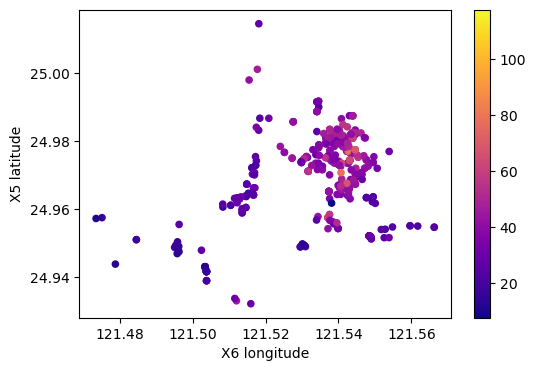

In [27]:
from sklearn.cluster import KMeans


def SquaredErrorKmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    return kmeans.inertia_

sqErrors = [SquaredErrorKmeans(data_no_id[['X5 latitude', 'X6 longitude']], k) for k in range(1, 11)]

plt.plot(range(1, 11), sqErrors, marker='o')
plt.show()

Anhand dieser Kurve können wir ablesen, dass der Punkt an welchem die Kurve abflacht bei 4 Clustern liegt. Dementsprechend verwenden wir 4 Cluster für die weitere Analyse. Das Ergebnis der Cluster-Analyse können wir dann in einem Scatter-Plot darstellen. In diesem Plot können wir dann die Farbe der Punkte anhand des Clusters welchem sie angehören bestimmen. Damit wir trotzdem den Preis pro Fläche darstellen können, verwenden wir in diesem Fall einen 3D-Scatter-Plot.

C:\Users\denni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\denni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


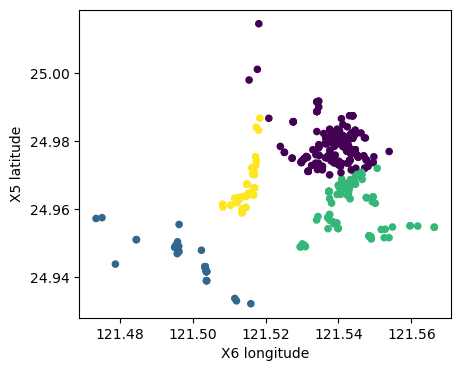

In [31]:
from scipy.spatial import ConvexHull

features = data_no_id[["X5 latitude", "X6 longitude"]]
kmeans = KMeans(n_clusters=4, random_state=0)  
kmeans.fit(features)
labels = kmeans.labels_
data_no_id['cluster'] = labels

# Plotting setup 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X5 latitude')
ax.set_ylabel('X6 longitude')
ax.set_zlabel('Y house price of unit area')

fig.set_size_inches(15, 10)

ax.set_box_aspect(None, zoom=0.95)
ax.scatter(data_no_id["X5 latitude"].values, data_no_id["X6 longitude"].values, data_no_id["Y house price of unit area"].values, c=data_no_id['cluster'], cmap="viridis", s=50)


plt.show()

Dieser 3D-Plot zeigt die Aufteilung der Immobilien in 4 Cluster. Es lässt sich beobachten, dass der Lila-Farbende Cluster die höchsten Preise pro Fläche aufweist. Es lässt sich auch erkennen, dass die Immobilien-Dichte innerhalb des Blauen und Gelben Clusters geringer ist, als in den anderen Beiden Clustern. Dies könnte darauf schließen lassen, dass wir hier den Vergleich einer eher ländlichen und einer eher städtischen Region haben.

Diese Vermutung lässt sich mithilfe von Google Maps überprüfen.

![image.png](maps.png)

Dieser Karten-Ausschnitt zeigt den ungefähren Bereich den der Datensatz abbildet. Wenn wir nun den Früheren Plot mit diesem Bild überlagern ergibt sich folgende Ansicht:

![image.png](maps2.png)

Wir können also feststellen, dass die verschiedenen Cluster tatsächlich unterschiedliche Regionen abbilden.

<h1 id="literaturverzeichnis">Literaturverzeichnis</h2>

<p id="refdata">[1] Yeh,I-Cheng. (2018). Real Estate Valuation. UCI Machine Learning Repository. https://doi.org/10.24432/C5J30W.</p>

<p id="refpip">[2] Python Paket-Manager pip - https://pypi.org/project/pip/ </p>

<p id="refpandas">[3] Pandas Python Bibliothek - https://pandas.pydata.org/ </p>

<p id="refnumpy">[4] Numpy Python Bibliothek - https://numpy.org/ </p>

<p id="refmpl">[5] Matplotlib Python Bibliothek - https://matplotlib.org/ </p>

<p id="refmrt">[6] Metro Taipei - https://english.metro.taipei/ </p>

<p id="refsklearn">[7] Scikit-learn - https://scikit-learn.org/stable/ </p>